# The Normal Equation

In [123]:
import warnings
warnings.filterwarnings('ignore')

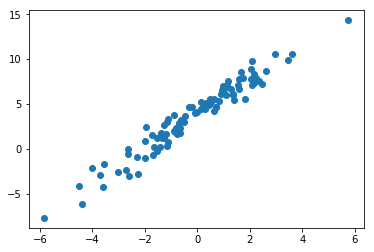

In [124]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

X = 2*np.random.randn(100, 1)
y = 4 + 2 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.show()

In [125]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.98441196],
       [1.93575   ]])

In [126]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.98441196],
       [7.85591196]])

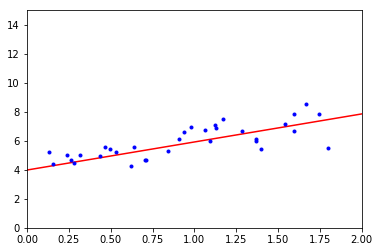

In [127]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

**The equivalent code** using Scikit-Learn looks like this:

In [128]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [129]:
lin_reg.intercept_, lin_reg.coef_

(array([3.98441196]), array([[1.93575]]))

In [130]:
s_y_predict = lin_reg.predict(X_new)
s_y_predict

array([[3.98441196],
       [7.85591196]])

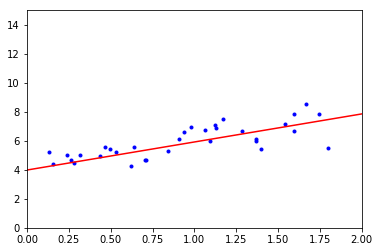

In [131]:
plt.plot(X, y, "b.")
plt.plot(X_new, s_y_predict, "r-")
plt.axis([0, 2, 0, 15])
plt.show()

In [132]:
X_new

array([[0],
       [2]])

In [133]:
s_y_predict

array([[3.98441196],
       [7.85591196]])

# Batch Gradient Descent

In [134]:
def plot_gradient_descent(theta, eta):
    n_iterations = 1000
    m = 100

    plt.plot(X, y, "b.")

    X_line = np.linspace(0, 2, 100).reshape(100, 1)
    X_line_b = np.c_[np.ones((100, 1)), X_line]

    for iteration in range(n_iterations):
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if iteration%10==0:
            plt.plot(X_line, X_line_b.dot(theta), 'k-')
    theta
    plt.axis([0, 2, 0, 15])
    plt.xlabel("$x_1$", fontsize=18)
    plt.title("$\eta={}$".format(eta), fontsize=16)
            

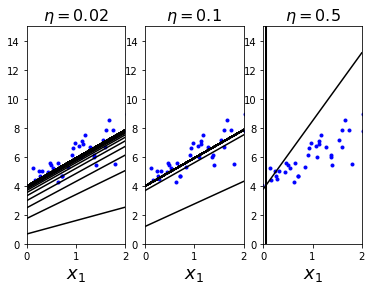

In [135]:
theta = np.random.randn(2,1)

plt.subplot(131); plot_gradient_descent(theta, 0.02)
plt.subplot(132); plot_gradient_descent(theta, 0.1)
plt.subplot(133); plot_gradient_descent(theta, 0.5)

plt.show()

# Stochastic Gradient Descent

$$\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^m\left(\theta^T\cdot x^{(i)}-y^{(i)}\right)x_j^{(i)}$$

$$\nabla_{\theta}MSE(\theta)=\frac{2}{m}X^T\cdot(X\cdot\theta-y)$$

In [136]:
n_epochs = 50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.00060334],
       [1.97016307]])

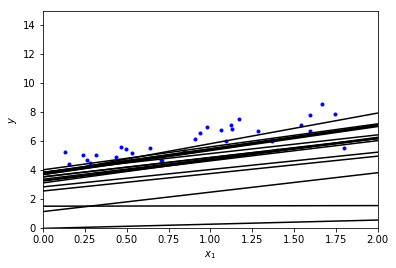

In [137]:
n_epochs = 50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)

plt.plot(X, y, "b.")
for epoch in range(n_epochs):
    for i in range(m):
        if epoch==0 and i<20:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, "k-")
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
plt.axis([0, 2, 0, 15])
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.show()

### Perform Linear Regression using SGD with Scikit-Learn.

In [138]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [139]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.96105727]), array([1.92828525]))

# Polynomial Regression

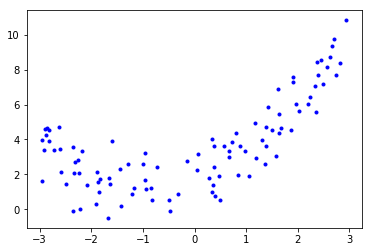

In [140]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.show()

In [150]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [151]:
X[0]

array([2.56484115])

In [152]:
X_poly[0]

array([2.56484115, 6.57841014])

In [153]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.76592222]), array([[1.03496375, 0.5734259 ]]))

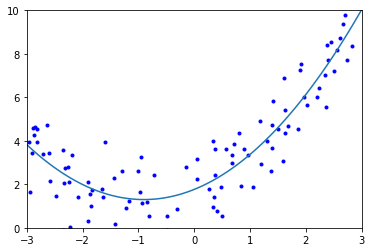

In [154]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "-", label="2")
plt.axis([-3, 3, 0, 10])
plt.show()

# Learning Curves

+ PolynomialFeatures 之后数据要进行预处理（StandardScaler）

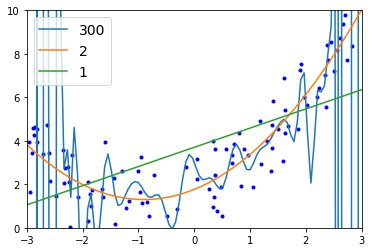

In [198]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def poly_curves(degree=2):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ('poly_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg)
    ])
    polynomial_regression.fit(X, y)
    
    y_new = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_new, "-", label="{0}".format(degree))
plt.plot(X, y, "b.")
poly_curves(degree=300)
poly_curves(degree=2)
poly_curves(degree=1)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [146]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14) 
    plt.axis([0, 80, 0, 3])
    plt.show()
    

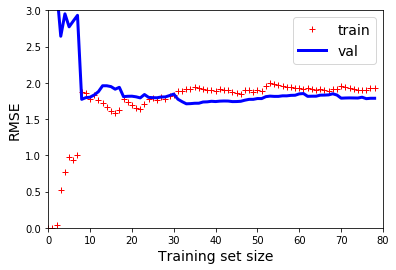

In [167]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

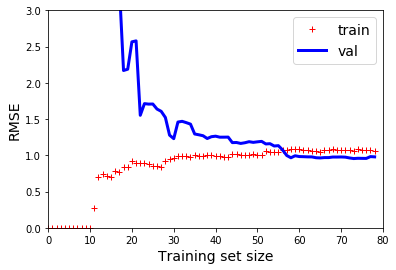

In [148]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
))

plot_learning_curves(polynomial_regression, X, y)

# Regularized Linear Models

In [230]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def differ_regression(model):
    plt.figure(figsize=(8, 4))

    plt.subplot(121)
    plt.plot(X, y, "b.")
    for alpha in (0, 10, 100):
        ridge_reg = model(alpha=alpha)
        ridge_reg.fit(X, y)
        y_ridge_new = ridge_reg.predict(X_new)
        plt.plot(X_new, y_ridge_new, label=r"$\alpha={0}$".format(alpha))
    plt.legend(loc="upper left", fontsize=10)
    plt.axis([0, 3, 0, 4])

    plt.subplot(122)
    plt.plot(X, y, "b.")
    for alpha in (0, 10**-5, 1):
        pipe_model = Pipeline([
            ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
            ('std_scaler', StandardScaler()),
            ('ridge_reg', Ridge(alpha=alpha))
        ])
        pipe_model.fit(X, y)
        y_pipe_new = pipe_model.predict(X_new)
        plt.plot(X_new, y_pipe_new, label=r"$\alpha={0}$".format(alpha))
    plt.legend(loc="upper left", fontsize=10)
    plt.axis([0, 3, 0, 4])
    plt.show()

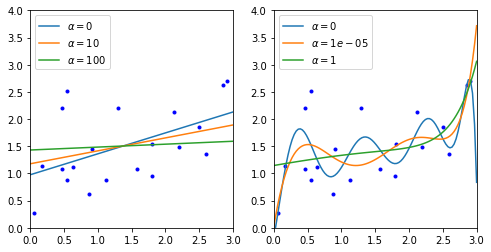

In [231]:
from sklearn.linear_model import Ridge

differ_regression(Ridge)

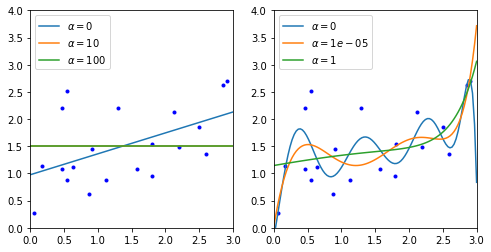

In [227]:
from sklearn.linear_model import Lasso

differ_regression(Lasso)

In [229]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.12550589])

# Elastic Net

In [228]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

# Early Stopping

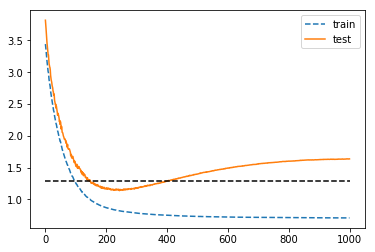

In [245]:
from sklearn.base import clone

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, 
                      learning_rate="constant", eta0=0.0005)

minimun_val_error = float("inf")
best_epoch = None
best_model = None
train_errors, test_errors = [], []
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    test_errors.append(mean_squared_error(y_val_predict, y_val))
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimun_val_error:
        minimun_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
plt.plot(np.sqrt(train_errors), "--", label="train")
plt.plot(np.sqrt(test_errors), "-", label="test")
plt.plot([0, 1000], [minimun_val_error, minimun_val_error], "k--")
plt.legend(loc="right top")
plt.show()

In [235]:
best_epoch

243

In [236]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=None,
       n_iter=1, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=True)

# Logistic Regression

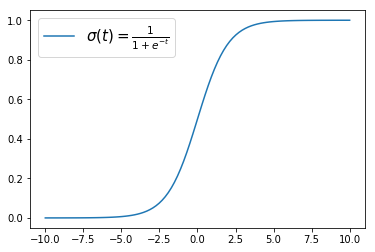

In [258]:
t = np.linspace(-10, 10, 100)
y_t = 1/(1+np.exp(-t))
plt.plot(t, y_t, label=r"$\sigma(t) = \frac{1}{1+e^{-t}}$")
plt.legend(loc="left top", fontsize=15)
plt.show()

In [261]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [266]:
X = iris["data"][:, 3:]
y = (iris["target"]==2).astype(np.int)

In [268]:
X.shape

(150, 1)

In [276]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

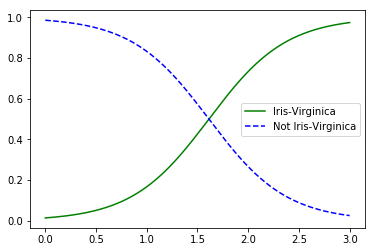

In [277]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend(loc="middle left")
plt.show()

In [278]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

# Softmax Regression

In [279]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

softmax_reg.predict([[5, 2]])

array([2])

In [280]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])